# Qsun

In [31]:

# ---- Benchamrking PSR on Qsun ----
num_qubits = 10
num_repeat = 10
times_Qsun = []
for i in range(1, num_qubits + 1):
    times = []
    for _ in range(num_repeat):
        start = time.time()
        params = np.random.normal(size=(3*i,))
        
        params = grad(cost_qsun, params)
        end = time.time()
        times.append(end-start)
    times_Qsun.append(np.mean(times))
print(times_Qsun)

[0.0003000020980834961, 0.0009001731872558594, 0.002799725532531738, 0.007200217247009278, 0.01760866641998291, 0.04099869728088379, 0.09350004196166992, 0.21152892112731933, 0.4718637228012085, 1.0379490375518798]


# ProjectQ

In [32]:
from projectq.backends import Simulator
from projectq import MainEngine
import projectq.ops as ops

def circuit_projectq(params, num_qubits):
    eng = MainEngine(backend=Simulator(gate_fusion=True), engine_list=[])
    qbits = eng.allocate_qureg(num_qubits)
    for j in range(0, num_qubits):
        ops.Rz(params[j]) | qbits[j]
        ops.Rx(params[j+1]) | qbits[j]
        ops.Rz(params[j+2]) | qbits[j]
        j += 3
    strings = ["".join(seq) for seq in itertools.product("01", repeat = num_qubits)]
    probs = np.array([eng.backend.get_probability(i, qbits) for i in strings])
    ops.All(ops.Measure) | qbits
    eng.flush()
    return probs
def cost_projectq(params):
    prob = circuit_projectq(params, len(params)//3)
    return -np.sum([i*prob[i] for i in range(len(prob))])

# ---- Benchamrking PSR on Qsun ----
times_ProjectQ = []
for i in range(1, num_qubits + 1):
    times = []
    for _ in range(num_repeat):
        start = time.time()
        params = np.random.normal(size=(3*i,))
        diff = np.zeros((3*i,))
        params = grad(cost_projectq, params)
        end = time.time()
        times.append(end-start)
    times_ProjectQ.append(np.mean(times))
print(times_ProjectQ)


(Note: This is the (slow) Python simulator.)
(Note: This is the (slow) Python simulator.)
(Note: This is the (slow) Python simulator.)
(Note: This is the (slow) Python simulator.)
(Note: This is the (slow) Python simulator.)
(Note: This is the (slow) Python simulator.)
(Note: This is the (slow) Python simulator.)
(Note: This is the (slow) Python simulator.)
(Note: This is the (slow) Python simulator.)
(Note: This is the (slow) Python simulator.)
(Note: This is the (slow) Python simulator.)
(Note: This is the (slow) Python simulator.)
(Note: This is the (slow) Python simulator.)
(Note: This is the (slow) Python simulator.)
(Note: This is the (slow) Python simulator.)
(Note: This is the (slow) Python simulator.)
(Note: This is the (slow) Python simulator.)
(Note: This is the (slow) Python simulator.)
(Note: This is the (slow) Python simulator.)
(Note: This is the (slow) Python simulator.)
(Note: This is the (slow) Python simulator.)
(Note: This is the (slow) Python simulator.)
(Note: Thi

# Pennylane

In [33]:
import pennylane as qml
dev = qml.device('default.qubit', wires=10)

@qml.qnode(dev)
def circuit_pennylane(params: np.ndarray, num_qubits: int):
    for j in range(0, num_qubits):
        qml.RZ(params[j], wires=j)
        qml.RX(params[j+1], wires=j)
        qml.RZ(params[j+2], wires=j)
        j += 3
    return qml.probs(wires=range(num_qubits))


def cost_pennylane(params):
    prob = circuit_pennylane(params, len(params)//3)
    return -np.sum([i*prob[i] for i in range(len(prob))])

# ---- Benchamrking PSR on Pennylane ----

times_Pennylane= []
for i in range(1, num_qubits + 1):
    times = []
    for _ in range(num_repeat):
        start = time.time()
        params = np.random.normal(size=(3*i,))
        diff = np.zeros((3*i,))
        params = grad(cost_pennylane, params)
        end = time.time()
        times.append(end-start)
    times_Pennylane.append(np.mean(times))
print(times_Pennylane)


[0.0033998727798461915, 0.008600091934204102, 0.017100095748901367, 0.0299088716506958, 0.046607375144958496, 0.07457056045532226, 0.11773920059204102, 0.19331574440002441, 0.3450721025466919, 0.6712116479873658]


# Qiskit

In [34]:
import qiskit
import qiskit.quantum_info
import numpy as np
def circuit_qiskit(params: np.ndarray, num_qubits: int):
    qc = qiskit.QuantumCircuit(num_qubits)
    for j in range(0, num_qubits, 3):
        qc.rz(params[j], j)
        qc.rx(params[j+1], j)
        qc.rz(params[j+2], j)
        j += 3
    return qiskit.quantum_info.Statevector.from_instruction(qc).probabilities()

def cost_qiskit(params):
    prob = circuit_qiskit(params, len(params)//3)
    return -np.sum([i*prob[i] for i in range(len(prob))])

# ---- Benchamrking PSR on Pennylane ----

times_Qiskit = []
for i in range(1, num_qubits + 1):
    times = []
    for _ in range(num_repeat):
        start = time.time()
        params = np.random.normal(size=(3*i,))
        diff = np.zeros((3*i,))
        params = grad(cost_qiskit, params)
        end = time.time()
        times.append(end-start)
    times_Qiskit.append(np.mean(times))
print(times_Qiskit)

[0.0017000913619995117, 0.0032996892929077148, 0.004299974441528321, 0.00800011157989502, 0.010299944877624511, 0.012900066375732423, 0.02030003070831299, 0.025099921226501464, 0.03147456645965576, 0.04780001640319824]


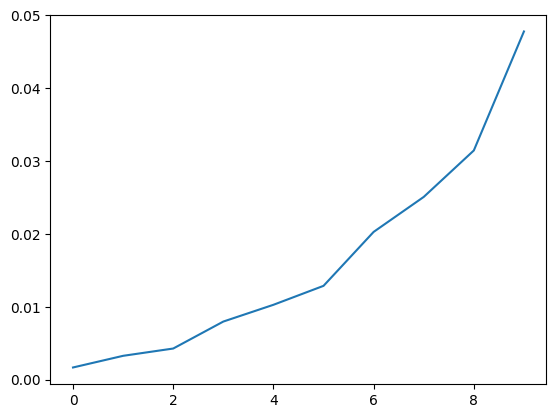

In [40]:
plt.plot(times_Qiskit)

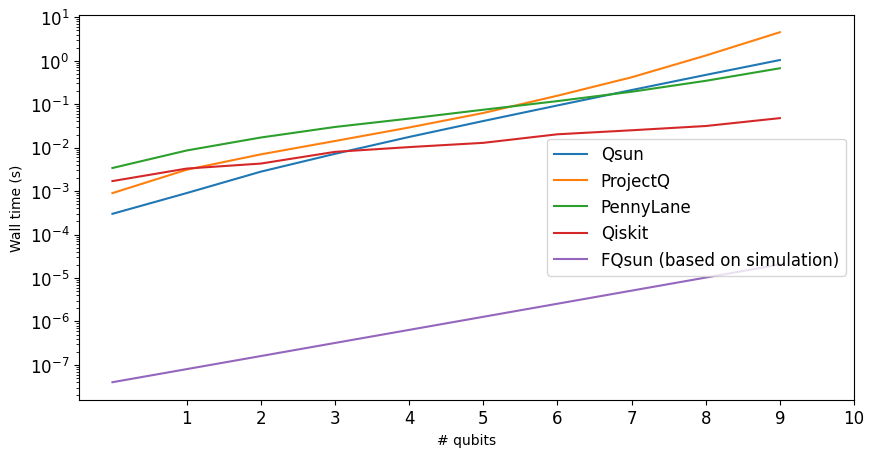

In [42]:
import matplotlib.pyplot as plt

labels = ['Qsun', 'ProjectQ', 'PennyLane', 'Qiskit']
line_stype = ['o--', 'v--', 's--', 'd--']
plt.figure(figsize=(10, 5))

plt.plot(times_Qsun, label='Qsun') 
plt.plot(times_ProjectQ, label='ProjectQ')
plt.plot(times_Pennylane, label='PennyLane')
plt.plot(times_Qiskit, label='Qiskit')
    
times_FQsun = []
for i in range(num_qubits):
    times_FQsun.append(4*(2**i)*(10**(-8)))

plt.plot(times_FQsun, label='FQsun (based on simulation)')
# plt.tick_params(axis="x", which='major', direction="in", length=16, width=4)
# plt.tick_params(axis="y", which='major', direction="in", length=16, width=4)
# plt.tick_params(axis="y", which='minor', direction="in", length=8, width=4)
plt.xticks(range(1, num_qubits + 1), fontsize=12)
plt.yticks(fontsize=12)
plt.yscale('log')
plt.xlabel('# qubits')
plt.legend(fontsize=12)
plt.ylabel('Wall time (s)')
plt.show()
# plt.savefig('compare_time_QCD_projectq.png')